## Building the Polarization Simulation and Deriving the Polarization Efficiency Equation

In [1]:
import random
import numpy as np
import scipy.stats
import math
import matplotlib.pyplot as plt
%matplotlib inline


def run_360_simulation(x):
    pol_eff_aves = []
    for i in range(x):
        ave = run_once_360()
        pol_eff_aves.append(ave)
    #print pol_eff_aves
    final_ave = np.mean(pol_eff_aves)
    return final_ave

def run_180_simulation(x):
    pol_eff_aves = []
    all_cos = []
    for i in range(x):
        ave, cos = run_once_180()
        pol_eff_aves.append(ave)
        all_cos.append(cos)
    final_ave = np.mean(pol_eff_aves)
    return final_ave, all_cos

def run_once_360():
    
    bud = [random.uniform((-180),(180)) for r in xrange(200)]
    target = [random.uniform((-180),(180)) for r in xrange(200)]
    
    plt.scatter(np.asarray(bud), np.asarray(target))
    plt.xlim(-180,180)
    plt.ylim(-180,180)
    plt.show()

    cos_values = []
    diff = []
    for x,y in zip(bud, target):
        curr_diff = abs(x-y)
        #curr_diff = x-y
        diff.append(curr_diff)
        rads = curr_diff*(np.pi/180)
        curr_cos = math.cos(rads)
        cos_values.append(curr_cos)
    
    plt.scatter(np.asarray(diff), np.asarray(cos_values))
    plt.xlim(-180,180)
    plt.ylim(-1,1)
    plt.show()
    
    ave = np.mean(cos_values)
    return ave
    
def run_once_180():
    
    bud = [random.uniform((-40),(40)) for r in xrange(30)]
    target_first = [random.uniform((30),(150)) for r  in xrange(30)] 
    
    target = [x+0 for x in target_first]

    cos_values = []
    diff = []
    for x,y in zip(bud, target):
        curr_diff = abs(x-y)
        #curr_diff = x-y
        diff.append(curr_diff)
        rads = curr_diff*(np.pi/180)
        curr_cos = math.cos(rads)
        cos_values.append(curr_cos)
    
    
    #plt.scatter(np.asarray(bud), np.asarray(target))
    #plt.xlim(-90,90)
    #plt.ylim(-90,90)
    #plt.xlabel('Bud vs Target')
    #plt.show()
    
    #plt.scatter(np.asarray(target), np.asarray(diff))
    #plt.xlim(-90,90)
    #plt.ylim(-90,90)
    #plt.xlabel('Target vs Diff')
    #plt.show()
    
    #plt.scatter(np.asarray(bud), np.asarray(diff))
    #plt.xlim(-90,90)
    #plt.ylim(-90,90)
    #plt.xlabel('Bud vs Diff')
    #plt.show()
    
    ave = np.mean(cos_values)
    return ave, cos_values    


#run_360_simulation(1)
#final_ave, all_cos = run_180_simulation(10000)

#cos = np.asarray(all_cos)
#print cos.shape
#all_means = []
#all_std = []
#for c in cos:
    #curr_mean = np.mean(c)
    #curr_std = np.std(c)
    #all_means.append(curr_mean)
    #all_std.append(curr_std)
    
#mean, sigma = np.mean(all_means), np.mean(all_std)

#ci = scipy.stats.norm.interval(0.95, loc=mean, scale=sigma/math.sqrt(10000))
#print ci
#print mean

#xs = [x for x in xrange(10000)]

#plt.scatter(xs, all_means)


In [2]:
def run_once_180():
    
    bud = [random.uniform((0),(180)) for r in xrange(30)]
    target = [random.uniform((0),(180)) for r  in xrange(30)] 

    cos_values = []
    diff = []
    diff_rads = []
    for x,y in zip(bud, target):
        curr_diff = abs(x-y)
        #curr_diff = x-y
        diff.append(curr_diff)
        rads = curr_diff*(np.pi/180)
        diff_rads.append(rads)
        curr_cos = math.cos(rads)
        cos_values.append(curr_cos)
        
    normal_rads = [x/np.pi for x in diff_rads]
    
    ave = np.mean(cos_values)
    return ave, cos_values, diff_rads, normal_rads


def run_180_simulation(x):
    pol_eff_aves = []
    all_cos = []
    norm_rads = []
    for i in range(x):
        ave, cos, rads, normal_rads = run_once_180()
        pol_eff_aves.append(ave)
        all_cos.append(cos)
        norm_rads.append(normal_rads)
    final_ave = np.mean(pol_eff_aves)
    return final_ave, all_cos, norm_rads


#ave, cos, rads, normal_rads = run_once_180()

#a, b, c = run_180_simulation(100)

-0.99581221768080086

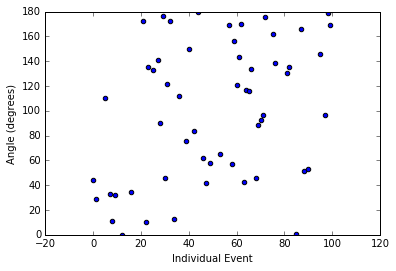

In [5]:
prob_dist = [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 4.0, 16.0, 0.0, 8.0, 4.0, 16.0, 8.0, 0.0, 0.0, 4.0, 0.0, 4.0, 0.0, 0.0, 0.0, 12.0, 4.0, 8.0, 4.0, 0.0, 0.0, 4.0, 0.0, 8.0, 4.0, 8.0, 8.0, 0.0, 12.0, 12.0, 4.0, 12.0, 4.0, 0.0, 4.0, 4.0, 4.0, 8.0, 4.0, 0.0, 4.0, 4.0, 8.0, 4.0, 8.0, 4.0, 4.0, 4.0, 0.0, 4.0, 0.0, 8.0, 0.0, 4.0, 4.0, 8.0, 0.0, 8.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 0.0, 8.0, 0.0, 12.0, 8.0, 4.0, 0.0, 4.0, 8.0, 0.0, 0.0, 4.0, 0.0, 4.0, 0.0, 8.0, 4.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 8.0, 0.0, 4.0, 4.0, 0.0, 4.0, 4.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 0.0, 4.0, 4.0, 0.0, 8.0, 0.0, 4.0, 4.0, 0.0, 4.0, 0.0, 4.0]

bud_dist = [4.0, 4.0, 8.0, 4.0, 8.0, 0.0, 8.0, 0.0, 0.0, 8.0, 12.0, 0.0, 4.0, 4.0, 4.0, 0.0, 0.0, 4.0, 0.0, 0.0, 20.0, 0.0, 8.0, 4.0, 8.0, 0.0, 8.0, 4.0, 8.0, 8.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 16.0, 0.0, 4.0, 0.0, 4.0, 0.0, 4.0, 0.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 8.0, 4.0, 12.0, 0.0, 8.0, 0.0, 0.0, 4.0, 0.0, 0.0, 8.0, 0.0, 8.0, 8.0, 4.0, 0.0, 8.0, 4.0, 0.0, 4.0, 12.0, 4.0, 4.0, 4.0, 8.0, 20.0, 4.0, 8.0, 4.0, 4.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 8.0, 0.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 8.0, 4.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0]

def run_once():
    
    bud = 0
    target = [random.uniform((0),(360)) for r in xrange(100)] 
    candidates = range(0,180)
    target_weighted = np.random.choice(candidates, 100, prob_dist)
    
    rads = []
    for y in target:
        theta = y - bud
        radians = theta*(np.pi/180)
        rads.append(radians)
        
    return rads

def run_simulation(x):
    values = []
    for i in xrange(x):
        theta = run_once()
        values.append(theta)
    pol = 1 - 2*(np.mean(values)/np.pi)
    return pol, values

pol, values = run_simulation(100)

rads = run_once()
degrees = [x*(180/np.pi) for x in rads]

xs = xrange(100)

plt.ylim(0, 180)
plt.scatter(xs, degrees)
plt.ylabel('Angle (degrees)')
plt.xlabel('Individual Event')
pol

0.81099632576
1.62199265152
46.4666666667
0.516296296296


0.48370370370370375

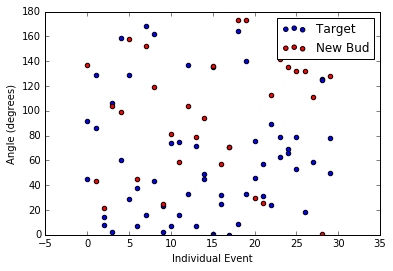

In [8]:
def run_once():
    
    prev_bud = 0
    new_bud = [random.uniform((0),(180)) for r in xrange(30)] 
    target = [random.uniform((0),(180)) for r in xrange(30)] 
    candidates = range(0,180)
    target_weighted = np.random.choice(candidates, 30, prob_dist)
    new_bud_weighted = np.random.choice(candidates, 30, bud_dist)
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    xs = range(0,30)
    ax1.scatter(xs, target_weighted, c='b', label='Target')
    ax1.scatter(xs, new_bud_weighted, c='r', label='New Bud')
    
    rads = []
    for x,y in zip(target_weighted, new_bud_weighted):
        theta = abs(x-y)
        radians = theta*(np.pi/180)
        rads.append(radians)
        
    return rads

def run_simulation(x):
    values = []
    for i in xrange(x):
        theta = run_once()
        values.append(theta)
    pol = 1 - 2*(np.mean(values)/np.pi)
    return pol, values

#pol, values = run_simulation(1)

rads = run_once()
pol_eff = 1 - 2*(np.mean(rads)/np.pi)
print np.mean(rads)
print 2*(np.mean(rads))
print np.mean(rads)*(180/np.pi)
print 2*(np.mean(rads)/np.pi)
degrees = [x*(180/np.pi) for x in rads]

xs = range(0,30)

plt.ylim(0, 180)
plt.scatter(xs, degrees)
plt.ylabel('Angle (degrees)')
plt.xlabel('Individual Event')
plt.legend()
pol
pol_eff

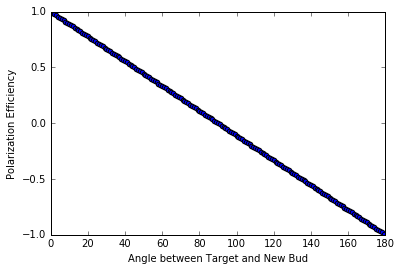

In [9]:
pol_eff = []
for x in range(0,180):
    radians = x*(np.pi/180)
    y = 1-2*(np.mean(radians)/np.pi)
    pol_eff.append(y)

xs = range(0,180)
plt.scatter(xs, pol_eff)
plt.xlim(0,180)
plt.ylim(-1,1)
plt.ylabel('Polarization Efficiency')
plt.xlabel('Angle between Target and New Bud')
plt.show()